In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [180]:
# data folders
superconductingcorecryocache = "superconductingcorecryocache/data/"
superconductingcorel1_cryol2l3 = "superconductingcorel1_cryol2l3/data/"
superconductingcorel1l2_cryol3 = "superconductingcorel1l2_cryol3/data/"
superconductingcorel1l2l3 = "superconductingcorel1l2l3/data/"

def extract_data(folder, suffix="", data=None):
    for freq in ["4GHz", "10GHz", "20GHz", "50GHz", "100GHz"]:
        df = pd.read_csv(folder + freq + ".csv")
        df["Frequency"] = freq
        df.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
        df.rename(columns=lambda col: f'{col}_{freq}_{suffix}' if col != "Benchmark" else col, inplace=True)
        if data is None:
            data = df
        else:
            data = data.merge(df, how="outer", on="Benchmark")
    return data

superconductingcorecryocache_data = extract_data(superconductingcorecryocache, "cryocache")
superconductingcorel1_cryol2l3_data = extract_data(superconductingcorel1_cryol2l3, "cryol2l3")
superconductingcorel1l2_cryol3_data = extract_data(superconductingcorel1l2_cryol3, "cryol3")
superconductingcorel1l2l3_data = extract_data(superconductingcorel1l2l3, "superl1l2l3")

data = superconductingcorecryocache_data.merge(superconductingcorel1_cryol2l3_data, how="outer", on="Benchmark")
data = data.merge(superconductingcorel1l2_cryol3_data, how="outer", on="Benchmark")
data = data.merge(superconductingcorel1l2l3_data, how="outer", on="Benchmark")

print(data.columns)


Index(['Benchmark', 'Cycles_4GHz_cryocache', 'Instructions_4GHz_cryocache',
       'IPC_4GHz_cryocache', 'Seconds_4GHz_cryocache',
       'l1dAccesses_4GHz_cryocache', 'l1iAccesses_4GHz_cryocache',
       'l2Accesses_4GHz_cryocache', 'l3Accesses_4GHz_cryocache',
       'Frequency_4GHz_cryocache',
       ...
       'Frequency_50GHz_superl1l2l3', 'Cycles_100GHz_superl1l2l3',
       'Instructions_100GHz_superl1l2l3', 'IPC_100GHz_superl1l2l3',
       'Seconds_100GHz_superl1l2l3', 'l1dAccesses_100GHz_superl1l2l3',
       'l1iAccesses_100GHz_superl1l2l3', 'l2Accesses_100GHz_superl1l2l3',
       'l3Accesses_100GHz_superl1l2l3', 'Frequency_100GHz_superl1l2l3'],
      dtype='object', length=181)


In [181]:
# calculate the speedup for each benchmark and frequency

data["Speedup_10GHz_cryocache"] = data["Seconds_4GHz_cryocache"] / data["Seconds_10GHz_cryocache"]
data["Speedup_20GHz_cryocache"] = data["Seconds_4GHz_cryocache"] / data["Seconds_20GHz_cryocache"]
data["Speedup_50GHz_cryocache"] = data["Seconds_4GHz_cryocache"] / data["Seconds_50GHz_cryocache"]
data["Speedup_100GHz_cryocache"] = data["Seconds_4GHz_cryocache"] / data["Seconds_100GHz_cryocache"]

data["Speedup_10GHz_cryol2l3"] = data["Seconds_4GHz_cryol2l3"] / data["Seconds_10GHz_cryol2l3"]
data["Speedup_20GHz_cryol2l3"] = data["Seconds_4GHz_cryol2l3"] / data["Seconds_20GHz_cryol2l3"]
data["Speedup_50GHz_cryol2l3"] = data["Seconds_4GHz_cryol2l3"] / data["Seconds_50GHz_cryol2l3"]
data["Speedup_100GHz_cryol2l3"] = data["Seconds_4GHz_cryol2l3"] / data["Seconds_100GHz_cryol2l3"]

data["Speedup_10GHz_cryol3"] = data["Seconds_4GHz_cryol3"] / data["Seconds_10GHz_cryol3"]
data["Speedup_20GHz_cryol3"] = data["Seconds_4GHz_cryol3"] / data["Seconds_20GHz_cryol3"]
data["Speedup_50GHz_cryol3"] = data["Seconds_4GHz_cryol3"] / data["Seconds_50GHz_cryol3"]
data["Speedup_100GHz_cryol3"] = data["Seconds_4GHz_cryol3"] / data["Seconds_100GHz_cryol3"]

data["Speedup_10GHz_superl1l2l3"] = data["Seconds_4GHz_superl1l2l3"] / data["Seconds_10GHz_superl1l2l3"]
data["Speedup_20GHz_superl1l2l3"] = data["Seconds_4GHz_superl1l2l3"] / data["Seconds_20GHz_superl1l2l3"]
data["Speedup_50GHz_superl1l2l3"] = data["Seconds_4GHz_superl1l2l3"] / data["Seconds_50GHz_superl1l2l3"]
data["Speedup_100GHz_superl1l2l3"] = data["Seconds_4GHz_superl1l2l3"] / data["Seconds_100GHz_superl1l2l3"]

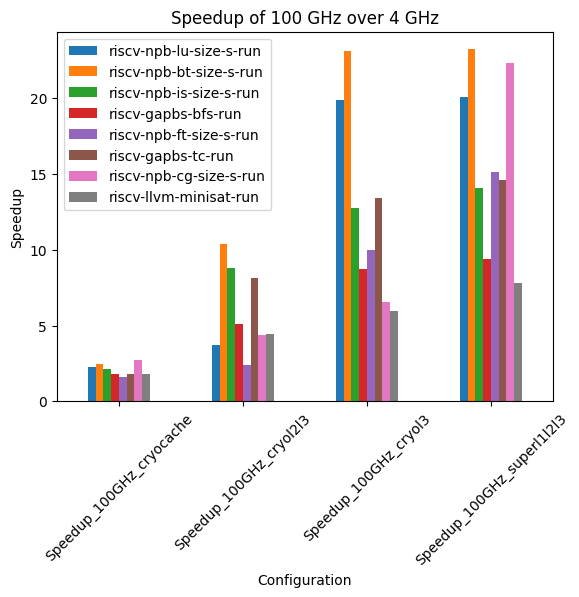

In [182]:
# Extract relevant columns for plotting
speedup_columns = [col for col in data.columns if col.startswith("Speedup")]

# # frequency on the x-axis, speedup on the y-axis, different bars for different suffixes of configurations
# for benchmark in data["Benchmark"].unique():
#     benchmark_data = data[data["Benchmark"] == benchmark]
#     benchmark_data = benchmark_data[speedup_columns]
#     benchmark_data = benchmark_data.T
#     benchmark_data.plot(kind="bar")
#     plt.title(benchmark)
#     plt.show()
#     plt.close()

# I want to see how speedup of 100 GHz over 4 GHz changes with different configurations
speedup_100GHz_over_4GHz = [col for col in speedup_columns if "100GHz" in col]
speedup_100GHz_over_4GHz = data[speedup_100GHz_over_4GHz]
speedup_100GHz_over_4GHz = speedup_100GHz_over_4GHz.T
speedup_100GHz_over_4GHz.plot(kind="bar")
# legend labels, they are actually the Benchmark names
plt.legend(data["Benchmark"].unique())
plt.xticks(rotation=45)
plt.ylabel("Speedup")
plt.xlabel("Configuration")
plt.title("Speedup of 100 GHz over 4 GHz")
plt.show()


In [190]:
# xticklabelmap = {
#     "Speedup_100GHz_cryocache": "Super Core + CryoCache",
#     "Speedup_100GHz_cryol2l3": "Super Core L1 + Cryo L2L3",
#     "Speedup_100GHz_cryol3": "Super Core L1L2 + Cryo L3",
#     "Speedup_100GHz_superl1l2l3": "Super Core Cache"
# }

# average_speedup_per_suffix = {}
# for suffix in data.columns:
#     if suffix.startswith("Speedup") and "100GHz" in suffix:
#         suffix_speedup = data[suffix]
#         average_speedup_per_suffix[suffix] = suffix_speedup.mean()

# # Plotting the average speedup per suffix
# plt.bar(average_speedup_per_suffix.keys(), average_speedup_per_suffix.values())
# plt.xticks(rotation=45)
# plt.xticks(range(len(average_speedup_per_suffix)), [xticklabelmap[col] for col in average_speedup_per_suffix.keys()])
# plt.ylabel("Average Speedup")
# plt.xlabel("Configuration")
# plt.title("Average Speedup of 100 GHz over 4 GHz for Each Configuration")
# plt.show()

def plot_average_speedup(freq):
    xticklabelmap = {
        f"Speedup_{freq}_cryocache": "Super Core + CryoCache",
        f"Speedup_{freq}_cryol2l3": "Super Core L1 + Cryo L2L3",
        f"Speedup_{freq}_cryol3": "Super Core L1L2 + Cryo L3",
        f"Speedup_{freq}_superl1l2l3": "Super Core Cache"
    }
    average_speedup_per_suffix = {}
    for suffix in data.columns:
        if suffix.startswith("Speedup") and freq in suffix:
            suffix_speedup = data[suffix]
            average_speedup_per_suffix[suffix] = suffix_speedup.mean()

    # Plotting the average speedup per suffix
    plt.bar(average_speedup_per_suffix.keys(), average_speedup_per_suffix.values())
    plt.xticks(rotation=45)
    plt.xticks(range(len(average_speedup_per_suffix)), [xticklabelmap[col] for col in average_speedup_per_suffix.keys()])
    plt.ylabel("Average Speedup")
    plt.xlabel("Configuration")
    plt.title(f"Average Speedup of {freq} over 4 GHz for Each Configuration")
    plt.show()


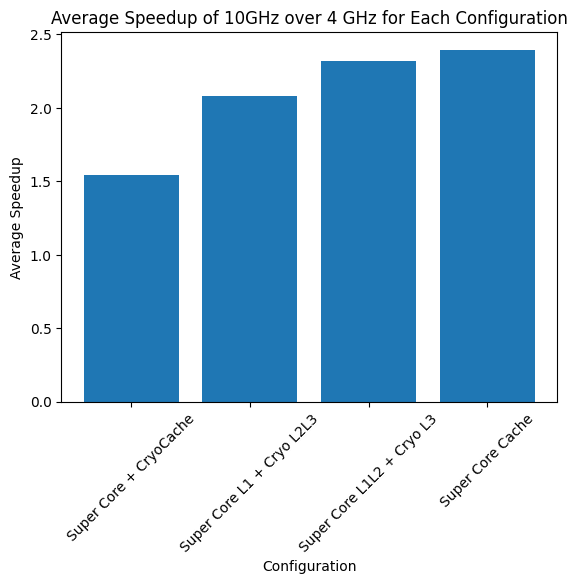

In [191]:
plot_average_speedup("10GHz")

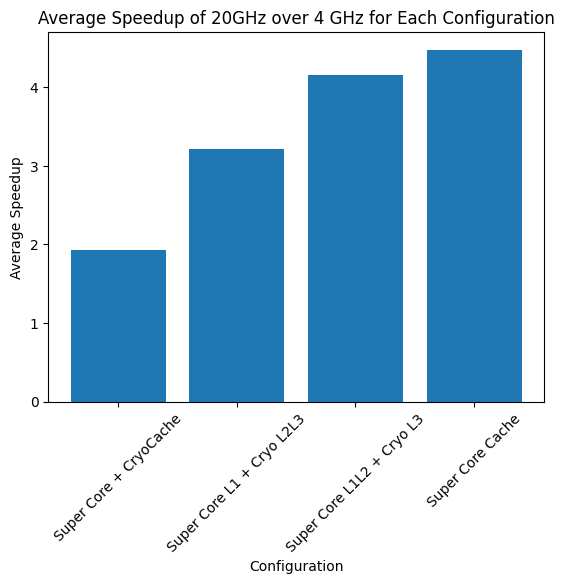

In [192]:
plot_average_speedup("20GHz")

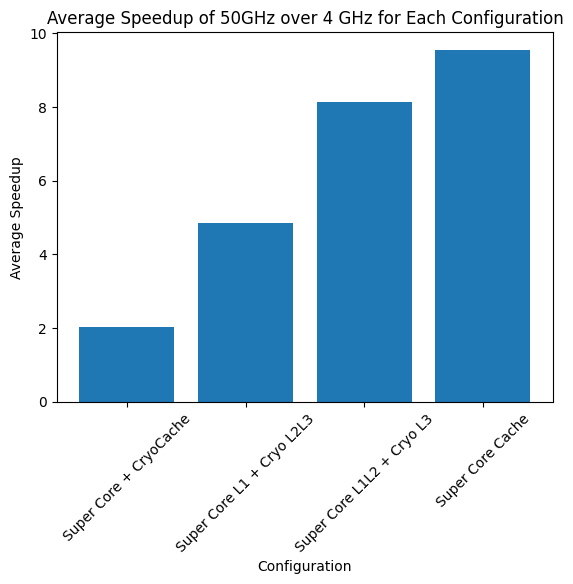

In [193]:
plot_average_speedup("50GHz")

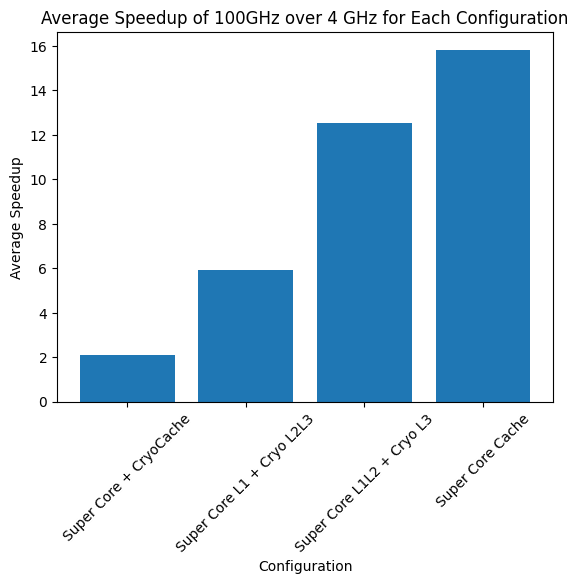

In [194]:
plot_average_speedup("100GHz")

In [ ]:
# plot average speedup for 100GHz for each configuration in one plot

superconductingcorecryocache_data['Speedup_100GHz'] = superconductingcorecryocache_data['Seconds'] / superconductingcorecryocache_data['Seconds100GHz']
superconductingcorel1_cryol2l3_data['Speedup_100GHz'] = superconductingcorel1_cryol2l3_data['Seconds'] / superconductingcorel1_cryol2l3_data['Seconds100GHz']
superconductingcorel1l2_cryol3_data['Speedup_100GHz'] = superconductingcorel1l2_cryol3_data['Seconds'] / superconductingcorel1l2_cryol3_data['Seconds100GHz']
superconductingcorel1l2l3_data['Speedup_100GHz'] = superconductingcorel1l2l3_data['Seconds'] / superconductingcorel1l2l3_data['Seconds100GHz']

superconductingcorecryocache_data['Speedup_10GHz'] = superconductingcorecryocache_data['Seconds'] / superconductingcorecryocache_data['Seconds10GHz']
superconductingcorel1_cryol2l3_data['Speedup_10GHz'] = superconductingcorel1_cryol2l3_data['Seconds'] / superconductingcorel1_cryol2l3_data['Seconds10GHz']
superconductingcorel1l2_cryol3_data['Speedup_10GHz'] = superconductingcorel1l2_cryol3_data['Seconds'] / superconductingcorel1l2_cryol3_data['Seconds10GHz']
superconductingcorel1l2l3_data['Speedup_10GHz'] = superconductingcorel1l2l3_data['Seconds'] / superconductingcorel1l2l3_data['Seconds10GHz']

superconductingcorecryocache_data['Speedup_20GHz'] = superconductingcorecryocache_data['Seconds'] / superconductingcorecryocache_data['Seconds20GHz']
superconductingcorel1_cryol2l3_data['Speedup_20GHz'] = superconductingcorel1_cryol2l3_data['Seconds'] / superconductingcorel1_cryol2l3_data['Seconds20GHz']
superconductingcorel1l2_cryol3_data['Speedup_20GHz'] = superconductingcorel1l2_cryol3_data['Seconds'] / superconductingcorel1l2_cryol3_data['Seconds20GHz']
superconductingcorel1l2l3_data['Speedup_20GHz'] = superconductingcorel1l2l3_data['Seconds'] / superconductingcorel1l2l3_data['Seconds20GHz']

superconductingcorecryocache_data['Speedup_50GHz'] = superconductingcorecryocache_data['Seconds'] / superconductingcorecryocache_data['Seconds50GHz']
superconductingcorel1_cryol2l3_data['Speedup_50GHz'] = superconductingcorel1_cryol2l3_data['Seconds'] / superconductingcorel1_cryol2l3_data['Seconds50GHz']
superconductingcorel1l2_cryol3_data['Speedup_50GHz'] = superconductingcorel1l2_cryol3_data['Seconds'] / superconductingcorel1l2_cryol3_data['Seconds50GHz']
superconductingcorel1l2l3_data['Speedup_50GHz'] = superconductingcorel1l2l3_data['Seconds'] / superconductingcorel1l2l3_data['Seconds50GHz']

# # Calculate average speedup for each configuration
# average_speedup_100GHz = {
#     'Superconducting Core Cryo Cache': superconductingcorecryocache_data['Speedup_100GHz'].mean(),
#     'Superconducting Core L1 Cryo L2/L3': superconductingcorel1_cryol2l3_data['Speedup_100GHz'].mean(),
#     'Superconducting Core L1/L2 Cryo L3': superconductingcorel1l2_cryol3_data['Speedup_100GHz'].mean(),
#     'Superconducting Core L1/L2/L3': superconductingcorel1l2l3_data['Speedup_100GHz'].mean()
# }

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.bar(average_speedup_100GHz.keys(), average_speedup_100GHz.values(), color='skyblue')
# plt.title('Average Speedup for 100GHz for Each Configuration')
# plt.xlabel('Configuration')
# plt.ylabel('Average Speedup for 100GHz')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

frequencies = [10, 20, 50, 100]

# Calculate average speedup for each configuration and frequency
average_speedup = {}
for freq in frequencies:
    speedup_key = f'Speedup_{freq}GHz'
    average_speedup[f'{freq} GHz'] = [
        superconductingcorecryocache_data[speedup_key].mean(),
        superconductingcorel1_cryol2l3_data[speedup_key].mean(),
        superconductingcorel1l2_cryol3_data[speedup_key].mean(),
        superconductingcorel1l2l3_data[speedup_key].mean()
    ]

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(average_speedup['10 GHz']))

for i, freq in enumerate(frequencies):
    plt.bar(index + i * bar_width, average_speedup[f'{freq} GHz'], bar_width, label=f'{freq} GHz')

plt.xlabel('Configuration')
plt.ylabel('Average Speedup')
plt.title('Average Speedup for Different Frequencies and Configurations')
plt.xticks(index + bar_width * (len(frequencies) - 1) / 2, ['Superconducting Core Cryo Cache', 'Superconducting Core L1 Cryo L2/L3', 'Superconducting Core L1/L2 Cryo L3', 'Superconducting Core L1/L2/L3'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'Seconds'

riscv-npb-lu-size-s-run: 0.9020676166526963, 23.006286836935168, 0.7924274672342333, 11.764522821576763
riscv-npb-bt-size-s-run: 1.1339093881363849, 0.5977812757664343, 36.73361300471945, 107.04021937842779
riscv-npb-is-size-s-run: 4.180851063829787, 14.088198757763974, 32.61111111111111, 1.4799043062200958
riscv-gapbs-bfs-run: 0.9341588643914225, 5.129353233830845, 23.142993326978075, 38.58764940239044
riscv-npb-ft-size-s-run: 3.5427603297425785, 0.6647563486616335, 8.712676056338028, 1.721346859486294
riscv-gapbs-tc-run: 1.7901234567901234, 9.340900346287032, 11.643737166324435, 18.51792524790236
riscv-npb-cg-size-s-run: 9.420917135961384, 1.508637236084453, 8.32873399715505, 4.878620689655173
riscv-llvm-minisat-run: 1.3424479166666665, 71.40774719673801, 14.42133815551537, 212.92097264437692
riscv-npb-lu-size-s-run: 0.9020676166526963, 0.6647563486616335, 32.61111111111111, 38.58764940239044
riscv-npb-bt-size-s-run: 1.1339093881363849, 9.340900346287032, 23.142993326978075, 18.51792

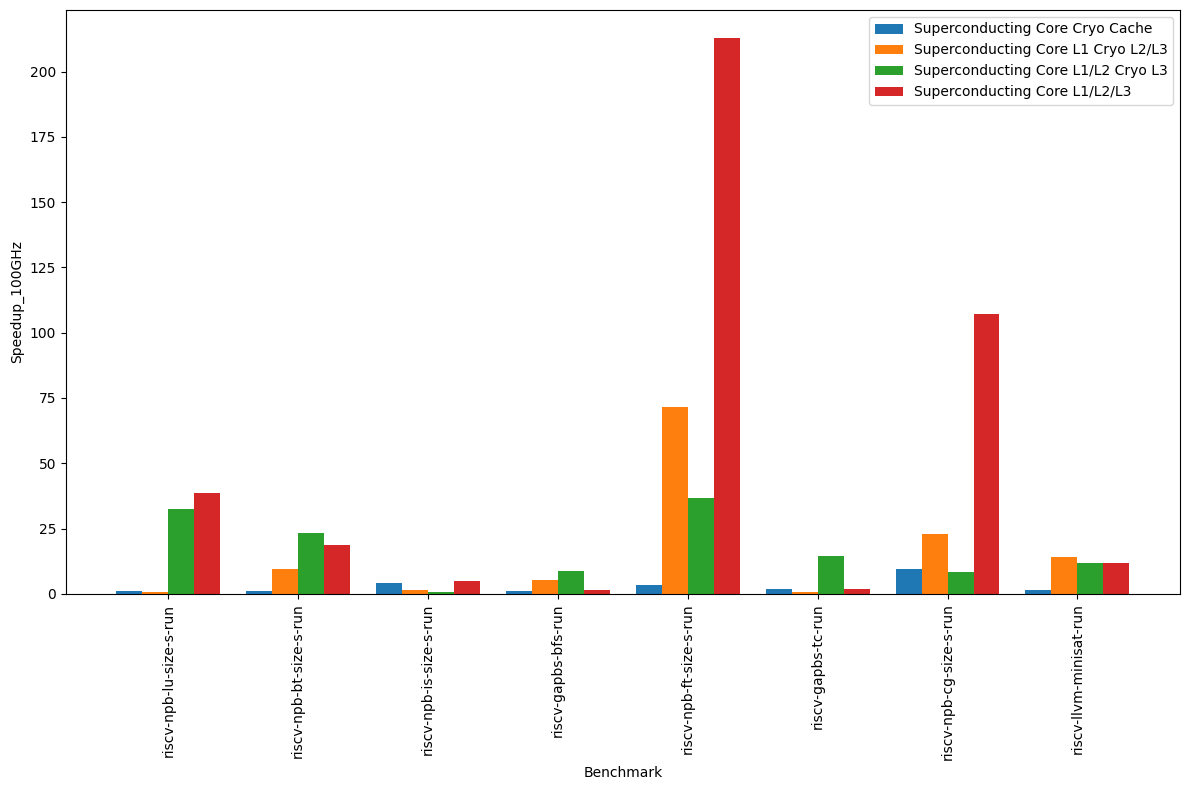

In [ ]:
# plot speedup of 100GHz for each workload in one plot

# superconductingcorecryocache_data['Speedup_100GHz'] = superconductingcorecryocache_data['Seconds'] / superconductingcorecryocache_data['Seconds100GHz']
# superconductingcorel1_cryol2l3_data['Speedup_100GHz'] = superconductingcorel1_cryol2l3_data['Seconds'] / superconductingcorel1_cryol2l3_data['Seconds100GHz']
# superconductingcorel1l2_cryol3_data['Speedup_100GHz'] = superconductingcorel1l2_cryol3_data['Seconds'] / superconductingcorel1l2_cryol3_data['Seconds100GHz']
# superconductingcorel1l2l3_data['Speedup_100GHz'] = superconductingcorel1l2l3_data['Seconds'] / superconductingcorel1l2l3_data['Seconds100GHz']
# first, rename Unnamed: 0 to Benchmark
superconductingcorecryocache_data = superconductingcorecryocache_data.rename(columns={'Unnamed: 0': 'Benchmark'})
superconductingcorel1_cryol2l3_data = superconductingcorel1_cryol2l3_data.rename(columns={'Unnamed: 0': 'Benchmark'})
superconductingcorel1l2_cryol3_data = superconductingcorel1l2_cryol3_data.rename(columns={'Unnamed: 0': 'Benchmark'})
superconductingcorel1l2l3_data = superconductingcorel1l2l3_data.rename(columns={'Unnamed: 0': 'Benchmark'})

# print speedups of every benchmark
for index, row in superconductingcorecryocache_data.iterrows():
    print(f"{row['Benchmark']}: {row['Speedup_100GHz']}, {superconductingcorel1_cryol2l3_data.iloc[index]['Speedup_100GHz']}, {superconductingcorel1l2_cryol3_data.iloc[index]['Speedup_100GHz']}, {superconductingcorel1l2l3_data.iloc[index]['Speedup_100GHz']}")

# merge all dataframes into one on the benchmark column

# merge
merged_data = superconductingcorecryocache_data.merge(superconductingcorel1_cryol2l3_data, on='Benchmark', suffixes=('_cryocache', '_l1_cryol2l3'))

# Add suffix to superconductingcorel1l2_cryol3_data columns except Benchmark column
superconductingcorel1l2_cryol3_data.rename(columns=lambda col: f'{col}_l1l2_cryol3' if col != 'Benchmark' else col, inplace=True)
superconductingcorel1l2l3_data.rename(columns=lambda col: f'{col}_l1l2l3' if col != 'Benchmark' else col, inplace=True)

merged_data = merged_data.merge(superconductingcorel1l2_cryol3_data, on='Benchmark')
merged_data = merged_data.merge(superconductingcorel1l2l3_data, on='Benchmark')

# print speedups of every benchmark
for index, row in merged_data.iterrows():
    print(f"{row['Benchmark']}: {row['Speedup_100GHz_cryocache']}, {row['Speedup_100GHz_l1_cryol2l3']}, {row['Speedup_100GHz_l1l2_cryol3']}, {row['Speedup_100GHz_l1l2l3']}")

# Width of each bar group
bar_width = 0.2

# Plot
plt.figure(figsize=(12, 8))

# Adjust x-coordinates for each group of bars
x = np.arange(len(merged_data['Benchmark']))

plt.bar(x - 1.5 * bar_width, merged_data['Speedup_100GHz_cryocache'], width=bar_width, label='Superconducting Core Cryo Cache')
plt.bar(x - 0.5 * bar_width, merged_data['Speedup_100GHz_l1_cryol2l3'], width=bar_width, label='Superconducting Core L1 Cryo L2/L3')
plt.bar(x + 0.5 * bar_width, merged_data['Speedup_100GHz_l1l2_cryol3'], width=bar_width, label='Superconducting Core L1/L2 Cryo L3')
plt.bar(x + 1.5 * bar_width, merged_data['Speedup_100GHz_l1l2l3'], width=bar_width, label='Superconducting Core L1/L2/L3')

# Add x-axis label and rotate labels for better readability
plt.xlabel('Benchmark')
plt.xticks(x, merged_data['Benchmark'], rotation=90)

# Add y-axis label
plt.ylabel('Speedup_100GHz')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:

# Define the configurations
configurations = ['Superconducting Core Cryo Cache', 'Superconducting Core L1 Cryo L2/L3', 'Superconducting Core L1/L2 Cryo L3', 'Superconducting Core L1/L2/L3']

# Define the frequencies
frequencies = [10, 20, 50, 100]

# Initialize a dictionary to hold average speedup for each configuration
average_speedup = {config: [] for config in configurations}

# Calculate average speedup for each configuration and frequency
for config in configurations:
    for freq in frequencies:
        speedup_key = f'Speedup_{freq}GHz'
        average_speedup[config].append(superconductingcorecryocache_data[speedup_key].mean())
        average_speedup[config].append(superconductingcorel1_cryol2l3_data[speedup_key].mean())
        average_speedup[config].append(superconductingcorel1l2_cryol3_data[speedup_key].mean())
        average_speedup[config].append(superconductingcorel1l2l3_data[speedup_key].mean())

# Plotting
plt.figure(figsize=(10, 6))

for config in configurations:
    plt.plot(frequencies, average_speedup[config], marker='o', label=config)

plt.xlabel('Frequency (GHz)')
plt.ylabel('Average Speedup')
plt.title('Average Speedup for Different Frequencies and Configurations')
plt.xticks(frequencies)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'Speedup_10GHz'